In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#dados do Yelp
df_negocios = pd.read_parquet('yelp_academic_dataset_business_cleaned.parquet')


X = df_negocios.drop(columns=['RestaurantsPriceRange2', 'business_id']).select_dtypes(include='number').fillna(0).values  
y = df_negocios['RestaurantsPriceRange2'].fillna(0).values #coluna alvo faixa de preço


Matriz de Confusão:
[[ 4433  6751    59     8]
 [ 2484 28746   220    18]
 [  284  1673    39     2]
 [   59   284    11     2]]

Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.61      0.39      0.48     11251
         2.0       0.77      0.91      0.83     31468
         3.0       0.12      0.02      0.03      1998
         4.0       0.07      0.01      0.01       356

    accuracy                           0.74     45073
   macro avg       0.39      0.33      0.34     45073
weighted avg       0.69      0.74      0.70     45073


Acurácia:
0.7370266012912386


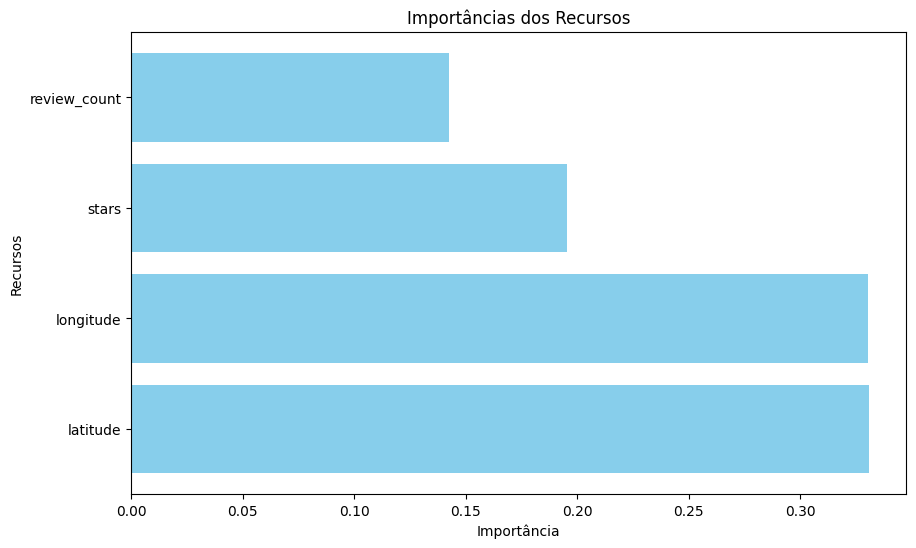

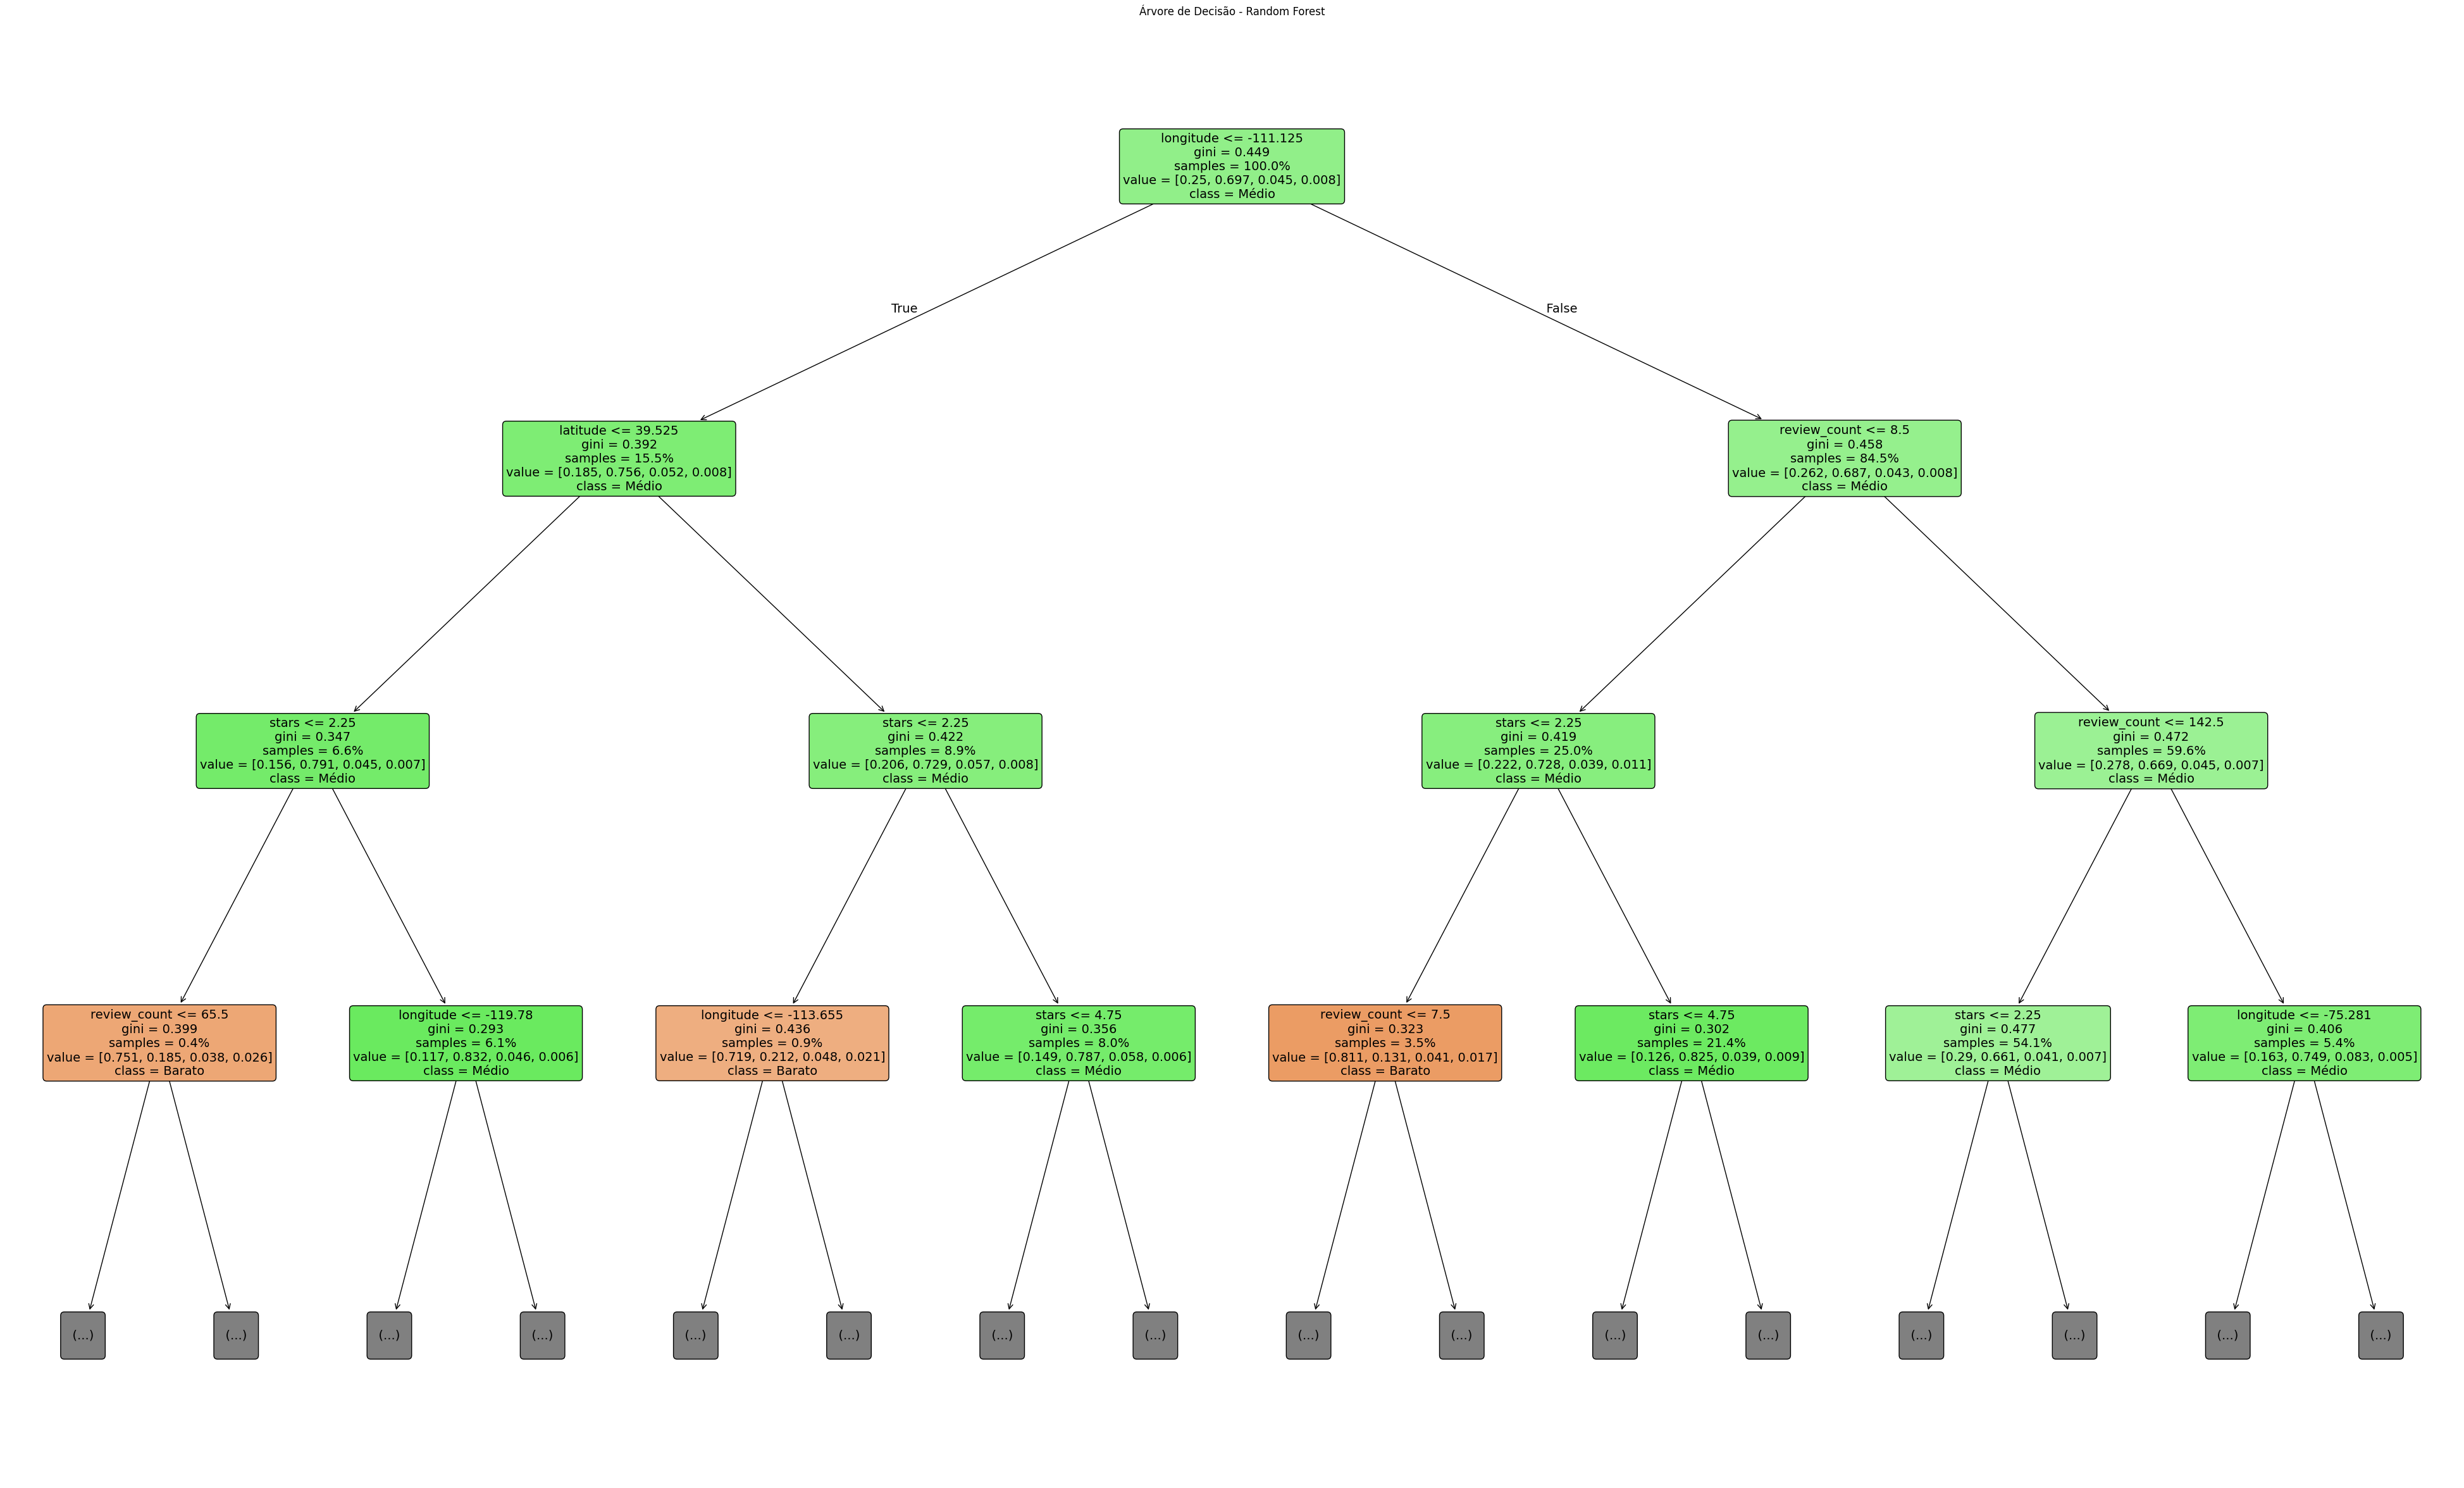

In [15]:
#num de arvores
clf = RandomForestClassifier(n_estimators=100, random_state=42)

ss = ShuffleSplit(n_splits=1, train_size=0.7, test_size=0.3, random_state=42)

for train_index, test_index in ss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    clf.fit(X_train, y_train)   
    
    y_pred = clf.predict(X_test)
    
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    
    print("\nAcurácia:")
    print(accuracy_score(y_test, y_pred))

#recursos
importances = clf.feature_importances_
feature_names = df_negocios.drop(columns=['RestaurantsPriceRange2', 'business_id']).select_dtypes(include='number').columns


#importâncias dos recursos
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, color='skyblue')
plt.yticks(range(len(importances)), feature_names)
plt.title("Importâncias dos Recursos")
plt.xlabel("Importância")
plt.ylabel("Recursos")
plt.show()

#árvore de decisão
plt.figure(figsize=(50,30))
plot_tree(
    clf.estimators_[0], 
    feature_names=feature_names,
    class_names=['Barato', 'Médio', 'Caro', 'Muito Caro'],
    filled=True,
    rounded=True,
    fontsize=14,
    max_depth=3,
    proportion=True,
)
plt.title("Árvore de Decisão - Random Forest")
plt.show()

In [14]:
#classificação knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

df_negocios = pd.read_parquet('yelp_academic_dataset_business_cleaned.parquet')

# Selecionar as colunas 
colunas_selecionadas = ['stars', 'review_count', 'latitude', 'longitude']
X = df_negocios[colunas_selecionadas].fillna(0).values  
y = df_negocios['RestaurantsPriceRange2'].fillna(0).values  # Coluna alvo (faixa de preço)

# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Criar o modelo KNN com 5 vizinhos
knn = KNeighborsClassifier(n_neighbors=5)

#treino/teste
ss = ShuffleSplit(n_splits=1, train_size=0.7, test_size=0.3, random_state=42)

for train_index, test_index in ss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #modelo KNN
    knn.fit(X_train, y_train)
    
    #previsões
    y_pred = knn.predict(X_test)
    
    
    print("Matriz de Confusão - KNN:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nRelatório de Classificação - KNN:")
    print(classification_report(y_test, y_pred))
    
    print("\nAcurácia - KNN:")
    print(accuracy_score(y_test, y_pred))


Matriz de Confusão - KNN:
[[ 4714  6505    29     3]
 [ 3490 27906    71     1]
 [  357  1631    10     0]
 [   86   267     3     0]]

Relatório de Classificação - KNN:
              precision    recall  f1-score   support

         1.0       0.55      0.42      0.47     11251
         2.0       0.77      0.89      0.82     31468
         3.0       0.09      0.01      0.01      1998
         4.0       0.00      0.00      0.00       356

    accuracy                           0.72     45073
   macro avg       0.35      0.33      0.33     45073
weighted avg       0.68      0.72      0.69     45073


Acurácia - KNN:
0.7239367248685465


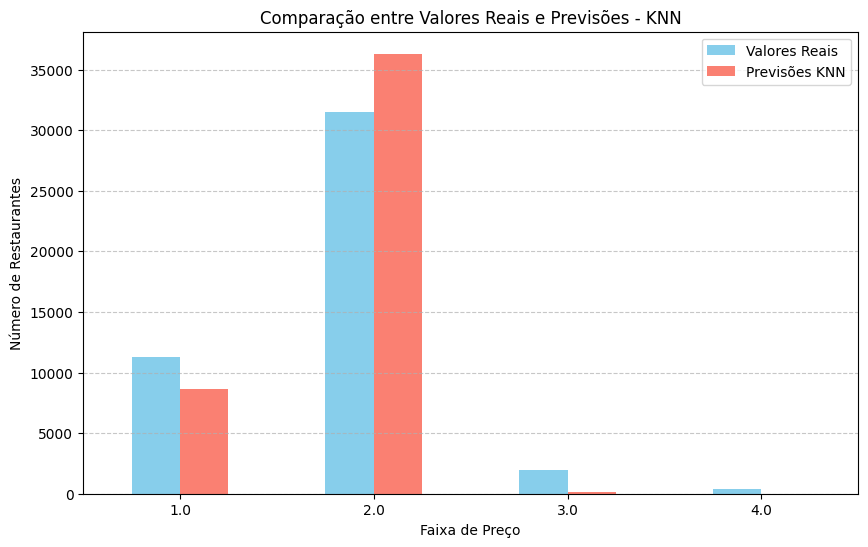

In [15]:
df_comparacao = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})

#Contar a quantidade de ocorrências de cada faixa de preço
contagem_real = df_comparacao['Real'].value_counts().sort_index()
contagem_prevista = df_comparacao['Previsto'].value_counts().sort_index()

# Criar um DataFrame combinando os valores reais e previstos
df_resultado = pd.DataFrame({'Real': contagem_real, 'Previsto': contagem_prevista}).fillna(0)

df_resultado.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])


plt.title("Comparação entre Valores Reais e Previsões - KNN")
plt.xlabel("Faixa de Preço")
plt.ylabel("Número de Restaurantes")
plt.xticks(rotation=0)  
plt.legend(["Valores Reais", "Previsões KNN"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Matriz de Confusão:
[[ 3853  7380    11     7]
 [  949 30482    33     4]
 [  200  1796     2     0]
 [   59   294     3     0]]

Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.76      0.34      0.47     11251
         2.0       0.76      0.97      0.85     31468
         3.0       0.04      0.00      0.00      1998
         4.0       0.00      0.00      0.00       356

    accuracy                           0.76     45073
   macro avg       0.39      0.33      0.33     45073
weighted avg       0.72      0.76      0.71     45073


Acurácia:
0.761808621569454


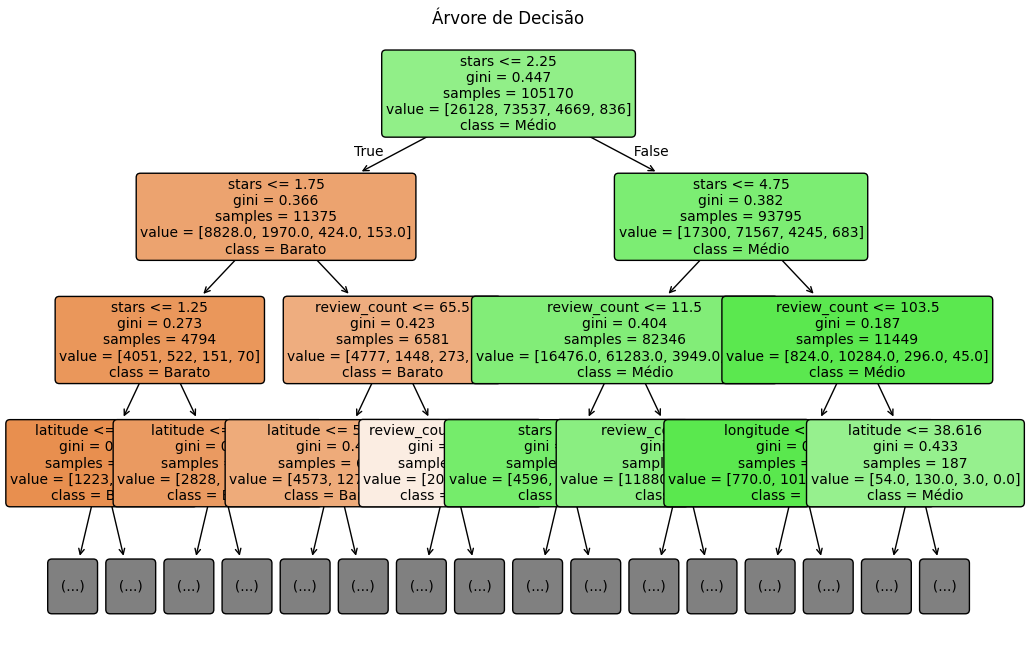

In [16]:
#arvore de decisao
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd  

df_negocios = pd.read_parquet('yelp_academic_dataset_business_cleaned.parquet')

X = df_negocios.drop(columns=['RestaurantsPriceRange2', 'business_id']).select_dtypes(include='number').fillna(0).values  
y = df_negocios['RestaurantsPriceRange2'].fillna(0).values  

#treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Árvore de Decisão
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=10)  #max_depth para evitar overfitting
dt_clf.fit(X_train, y_train)

#previsões
y_pred_dt = dt_clf.predict(X_test)

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_dt))

print("\nAcurácia:")
print(accuracy_score(y_test, y_pred_dt))


#Árvore de Decisão
plt.figure(figsize=(12,8))
plot_tree(dt_clf, filled=True, feature_names=df_negocios.drop(columns=['RestaurantsPriceRange2', 'business_id']).select_dtypes(include='number').columns, class_names=['Barato', 'Médio', 'Caro', 'Muito Caro'], rounded=True, fontsize=10, max_depth=3, impurity=True,proportion=False)
plt.title("Árvore de Decisão")
plt.show()


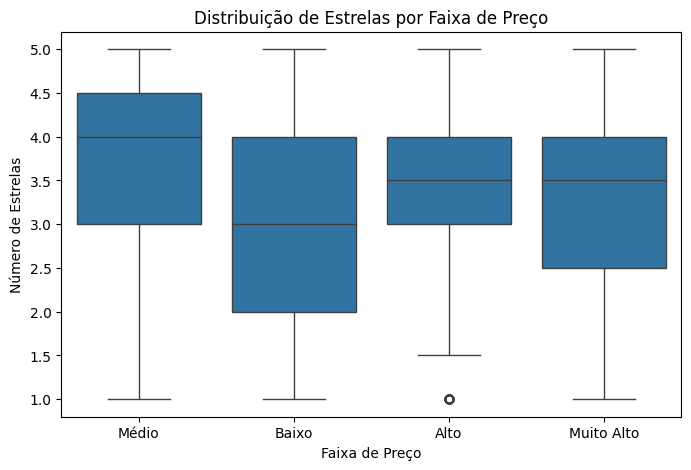

In [19]:
# Gráfico do modelo SVM: Faixa de preço x Número de estrelas

import seaborn as sns
import matplotlib.pyplot as plt

# Mapear os valores da faixa de preço para categorias mais detalhadas
faixa_preco_map = {
    1: 'Baixo',
    2: 'Médio',
    3: 'Alto',
    4: 'Muito Alto'
}

df_negocios['Faixa de Preço'] = df_negocios['RestaurantsPriceRange2'].map(faixa_preco_map)

# Gráfico específico do SVM: Faixa de preço x Número de estrelas
if 'stars' in df_negocios.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_negocios['Faixa de Preço'], y=df_negocios['stars'])
    plt.title('Distribuição de Estrelas por Faixa de Preço')
    plt.xlabel('Faixa de Preço')
    plt.ylabel('Número de Estrelas')
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif

# Dividir os dados em treino e teste para evitar validação cruzada demorada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seleção de features para otimizar o KNN
selector = SelectKBest(score_func=f_classif, k=20)  # Mantém as 20 melhores features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Normalizar os dados (escalonar para ajudar no desempenho do SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Random Forest (reduzido n_estimators para 50 e continua com o class_weight='balanced')
rf = RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=42)
rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv=3, n_jobs=-1)  
print(f"Random Forest - Média Accuracy: {rf_scores.mean():.4f} (+- {rf_scores.std():.4f})")

# KNN (usando features reduzidas e ajustando o número de vizinhos para 3)
knn = KNeighborsClassifier(n_neighbors=3)  # Número de vizinhos ajustado
knn_scores = cross_val_score(knn, X_train_selected, y_train, cv=3, n_jobs=-1)
print(f"KNN - Média Accuracy: {knn_scores.mean():.4f} (+- {knn_scores.std():.4f})")

# SVM com kernel linear (muito mais rápido do que o 'rbf')
svm = SVC(kernel='linear', class_weight='balanced', random_state=42)  # Usando kernel linear
svm_scores = cross_val_score(svm, X_train_scaled, y_train, cv=3, n_jobs=-1)
print(f"SVM (kernel linear) - Média Accuracy: {svm_scores.mean():.4f} (+- {svm_scores.std():.4f})")


c:\Users\PEA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:779: UserWarning: k=20 is greater than n_features=4. All the features will be returned.
  warnings.warn(


Random Forest - Média Accuracy: 0.7423 (+- 0.0021)
KNN - Média Accuracy: 0.6945 (+- 0.0020)


Random Forest - Acurácia: 0.7386
Matriz de Confusão:
[[ 4420  6760    61    10]
 [ 2414 28829   208    17]
 [  280  1675    41     2]
 [   63   280    11     2]]

Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.62      0.39      0.48     11251
         2.0       0.77      0.92      0.84     31468
         3.0       0.13      0.02      0.04      1998
         4.0       0.06      0.01      0.01       356

    accuracy                           0.74     45073
   macro avg       0.39      0.33      0.34     45073
weighted avg       0.70      0.74      0.70     45073

--------------------------------------------------
KNN - Acurácia: 0.7239
Matriz de Confusão:
[[ 4714  6505    29     3]
 [ 3490 27906    71     1]
 [  357  1631    10     0]
 [   86   267     3     0]]

Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.55      0.42      0.47     11251
         2.0       0.77      0.89

c:\Users\PEA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PEA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PEA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

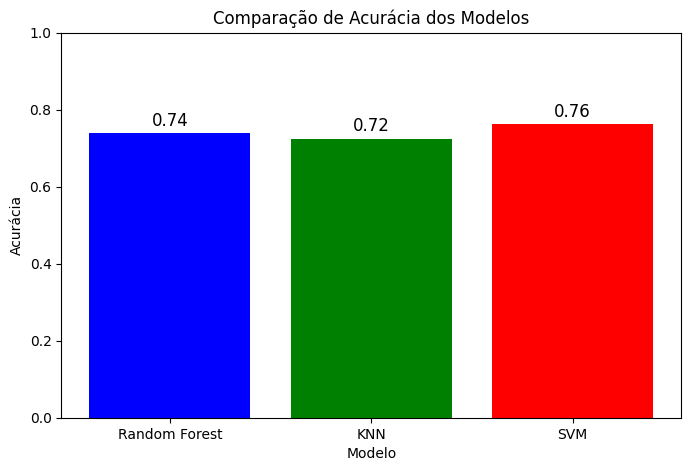

In [1]:
#Comparação entre os 3 modelos

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import ShuffleSplit
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados
df_negocios = pd.read_parquet('yelp_academic_dataset_business_cleaned.parquet')
X = df_negocios.drop(columns=['RestaurantsPriceRange2', 'business_id']).select_dtypes(include='number').fillna(0).values  
y = df_negocios['RestaurantsPriceRange2'].fillna(0).values 

# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Criar divisão de treino e teste
ss = ShuffleSplit(n_splits=1, train_size=0.7, test_size=0.3, random_state=42)
train_index, test_index = next(ss.split(X, y))
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

# Reduzindo tamanho do dataset para SVM ser mais rápido
X_train_subset = X_train[:10000]
y_train_subset = y_train[:10000]

# Modelos para comparação (sem Regressão Logística)
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', random_state=42)  # Kernel RBF para maior eficiência
}

# Avaliação dos modelos
results = {}
for name, model in models.items():
    if name == 'SVM':
        model.fit(X_train_subset, y_train_subset)  # Usando o subconjunto menor para treinar SVM
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} - Acurácia: {accuracy:.4f}")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Comparação gráfica
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red'])
plt.title('Comparação de Acurácia dos Modelos')
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.ylim(0, 1)
for i, v in enumerate(results.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
plt.show()
